In [6]:
%load_ext autoreload
%autoreload 2

from collections import defaultdict

import dvu
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import numpy as np
import eval
import paper_setup
plt.style.use('default')
dvu.set_style()
UNKS = {"Unk", "-", -1, "-1"}
# df = pd.read_csv('../data/main.csv')
df, ids_with_paper = paper_setup.download_gsheet()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Look at gender ratios

In [7]:
idxs = (df["num_male_corrected"].notnull() & ~(df["num_male_corrected"].isin(UNKS))) & (
    df["num_female_corrected"].notnull() & ~(df["num_female_corrected"].isin(UNKS))
)
male = df["num_male_corrected"][idxs].astype(int)
female = df["num_female_corrected"][idxs].astype(int)

In [8]:
ratios = (male / female).values
# drop inf
print(sorted(ratios))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14014251781472684, 0.19718309859154928, 0.20481927710843373, 0.2193158953722334, 0.2647058823529412, 0.2787716579799972, 0.2787716579799972, 0.2787716579799972, 0.2883435582822086, 0.33684794672586016, 0.4050632911392405, 0.4728518713758566, 0.48488180318856516, 0.5, 0.525, 0.56, 0.5743589743589743, 0.5748031496062992, 0.6142857142857143, 0.6142857142857143, 0.6239465271723337, 0.6404109589041096, 0.6555804285257435, 0.656172328086164, 0.6763005780346821, 0.6948228882833788, 0.6972704714640199, 0.7129629629629629, 0.7170818505338078, 0.7421619092185306, 0.7525252525252525, 0.7727272727272727, 0.8007149240393209, 0.8067961165048544, 0.8067961165048544, 0.8189189189189189, 0.8223443223443223, 0.8356164383561644, 0.8397693079237714, 0.8623481781376519, 0.8714985994397759, 0.8837209302325582, 0.8894557823129252, 0.8987764182424917, 0.9019762845849802, 0.9255131964809384, 0.9378298153034301, 0.9492281717317896, 0.96, 0.9905170692753045, 0.9946

mean 2.08 median 1.27 frac>0 131 / 185 excluding 11 all-male studies and 9 all-female studies


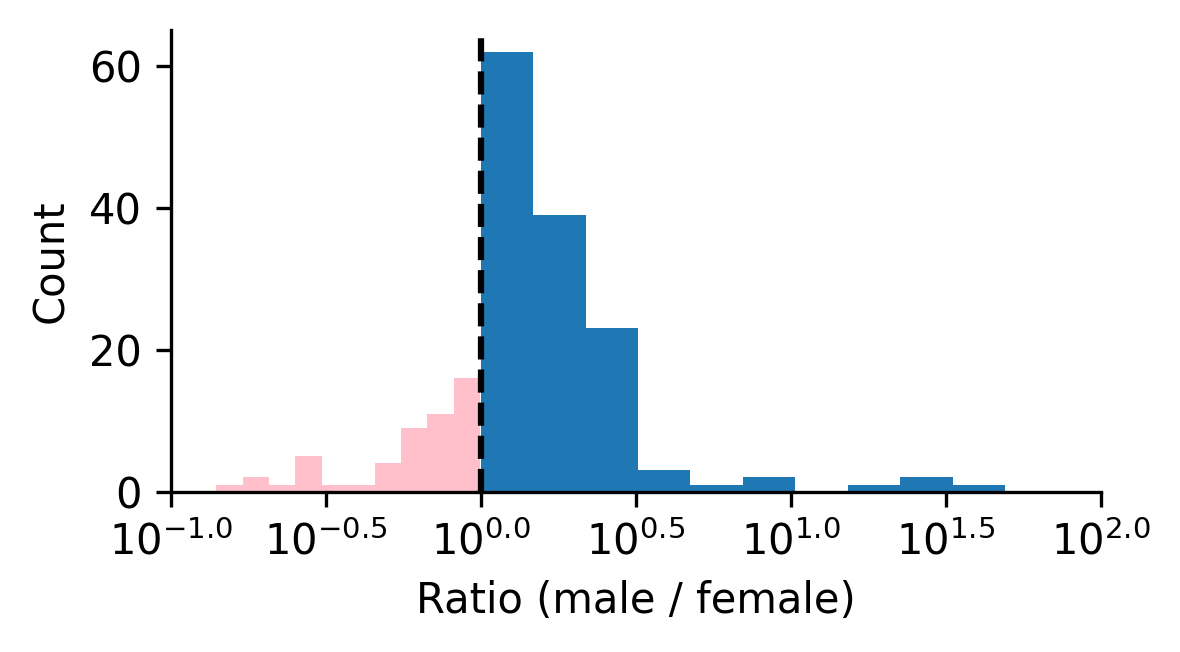

In [9]:
plt.figure(figsize=(4, 2), dpi=300)
r = ratios[~np.isinf(ratios)]
r = r[r > 0]
logr = np.log10(r)
print(
    "mean",
    r.mean().round(2),
    'median',
    np.median(r).round(2),
    "frac>0",
    (r > 1).sum(),
    "/",
    len(r),
    "excluding",
    np.sum(np.isinf(ratios)),
    "all-male studies and",
    np.sum(ratios == 0),
    "all-female studies",
)
plt.hist(logr[logr < 0], color="pink")  # , bins=100)
plt.hist(logr[logr >= 0], color="C0")  # , bins=100)
plt.axvline(0, color="black", ls="--")
ticks = plt.xticks()[0]
plt.xticks(ticks, [f"$10^{{{t}}}$" for t in ticks])
plt.xlabel("Ratio (male / female)")
plt.ylabel("Count")
plt.show()

mean frac_male 55.55 perc skewed 0.693


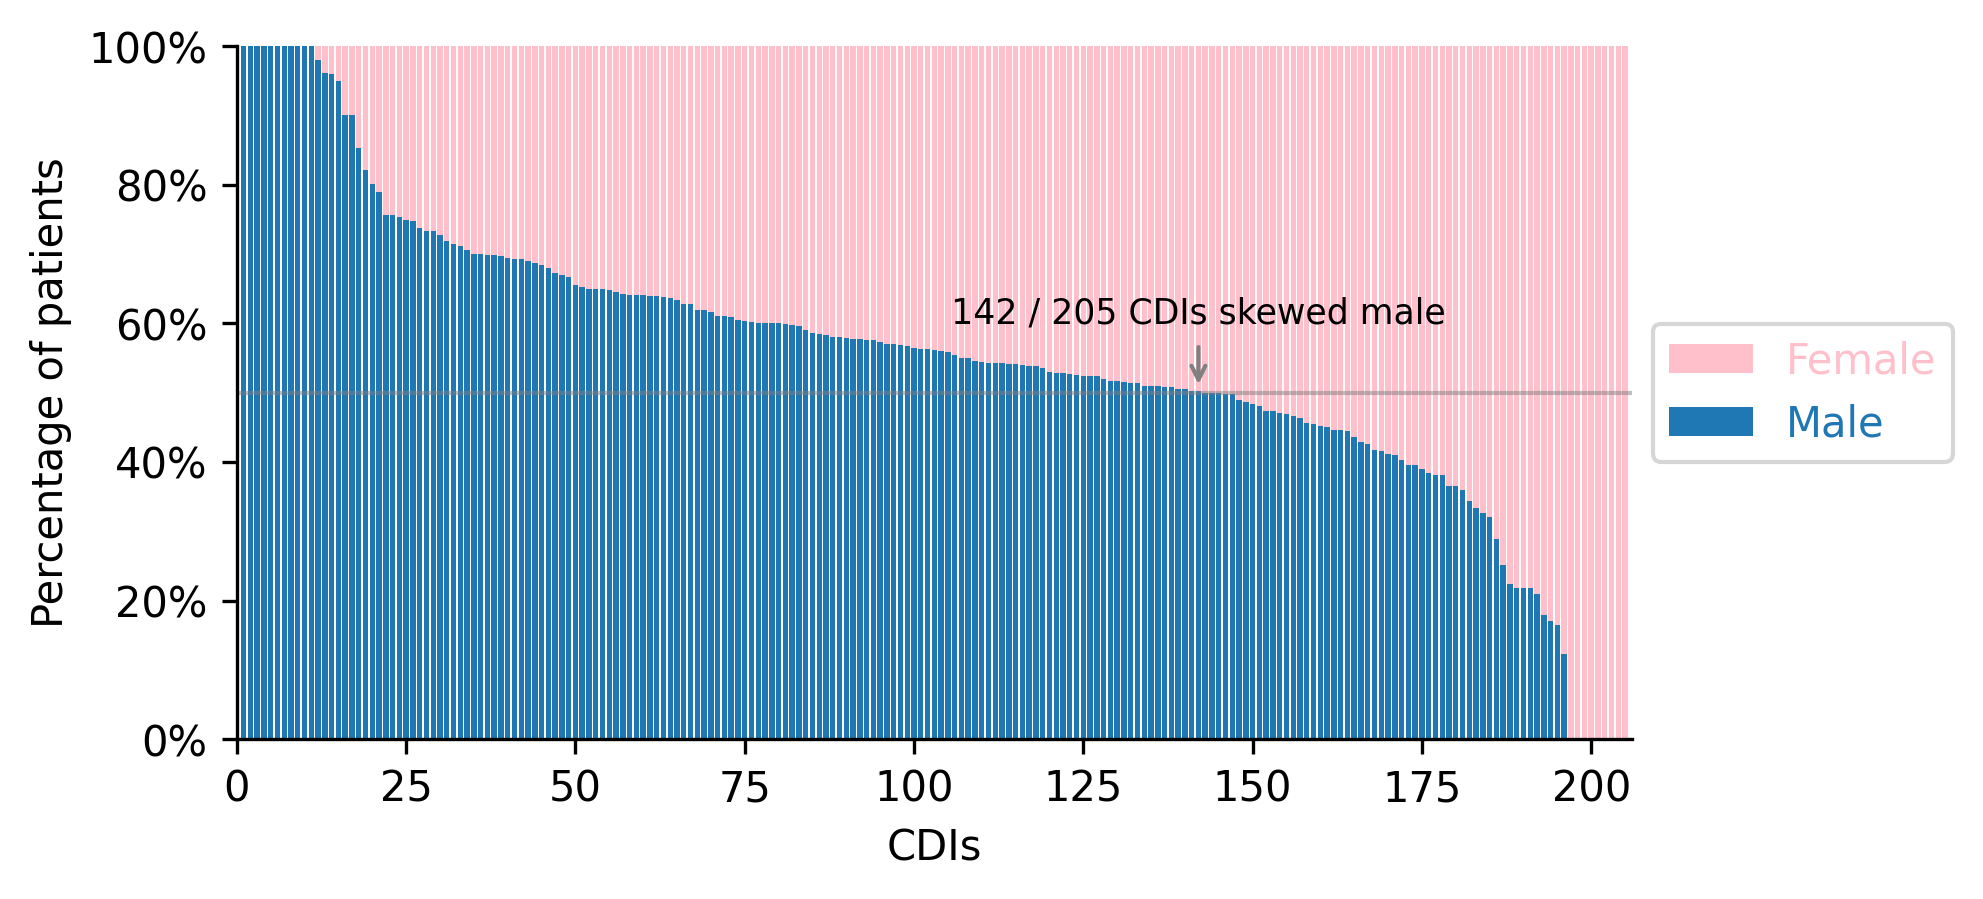

In [10]:
frac_male = male / (male + female)
frac_female = female / (male + female)
args = np.argsort(frac_male)[::-1]
frac_male = frac_male.values[args] * 100
frac_female = frac_female.values[args] * 100

# barplot showing frac_male and frac_female as stacked bars
plt.figure(figsize=(6, 3), dpi=300)

num_cdis = len(frac_male)
bar_positions = np.arange(num_cdis) + 1
plt.bar(bar_positions, frac_female, bottom=frac_male, label="Female", color="pink")
plt.bar(bar_positions, frac_male, label="Male", color="C0")
plt.axhline(50, color="gray", alpha=0.5, lw=1)

plt.xlabel("CDIs")
plt.ylabel("Percentage of patients")
# place legend to the right of the plot
plt.legend(labelcolor="linecolor", loc="center left", bbox_to_anchor=(1, 0.5))
# plt.xticks(np.arange(1, num_cdis + 1, num_cdis//3), np.arange(1, num_cdis + 1, num_cdis//3))
plt.xlim(left=0, right=num_cdis + 1)
plt.yticks(np.arange(0, 101, 20), [f"{t}%" for t in np.arange(0, 101, 20)])

# annotate the point where the two bars cross 50 percent
x_cross = np.where(frac_male <= frac_female)[0][0]
plt.annotate(
    f"{x_cross} / {num_cdis} CDIs skewed male",
    (x_cross, 50),
    xytext=(x_cross, 60),
    ha="center",
    arrowprops=dict(arrowstyle="->", color="gray"),
    fontsize="small",
)
print(
    "mean frac_male",
    np.mean(frac_male).round(2),
    "perc skewed",
    round(np.sum(frac_male > frac_female) / len(frac_male), 3),
)

# Show the plot
plt.show()

### Overall study counts

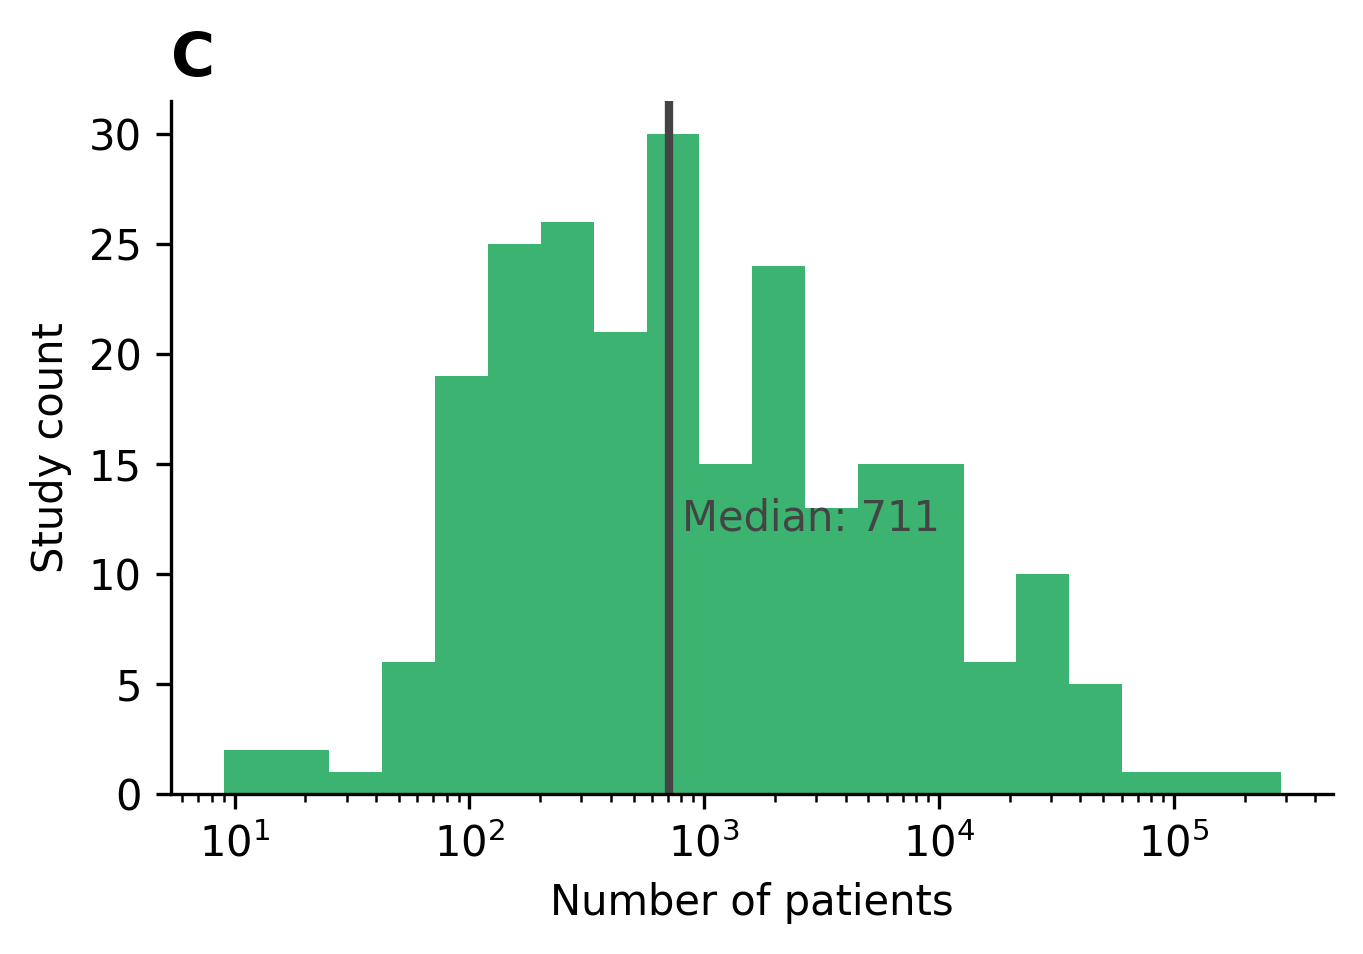

In [11]:

x = df['num_total_corrected']
x = x[x > 0]
hist, bins, _ = plt.hist(x, bins=20)
plt.cla()
plt.close()
# histogram on log scale.
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))
plt.figure(dpi=300, figsize=(5, 3))
avg = np.median(x)
plt.axvline(x=avg, ls='-', color='#444', lw=2)
plt.text(s=f'Median: {avg:,.0f}', x=avg + 90, y=12, color='#444')
plt.hist(x, bins=logbins, color='mediumseagreen')
plt.xscale("log")
plt.xlabel('Number of patients')
plt.ylabel('Study count')
plt.title('C', loc='left', fontsize='x-large', fontweight='bold')
plt.show()

### Race ratios

['38.7%' '46.5%' '43.0%' '92.3%' '57.4%' '73.7%' '81.9%' '74%' '90%'
 '95.2%' '80.0%' '80%' '92.3%' '92.3%' '51%' '79%' '81.5%' '38%' '142'
 '73%' '55.6%'] [38.7, 46.5, 43.0, 92.3, 57.4, 73.7, 81.9, 74.0, 90.0, 95.2, 80.0, 80.0, 92.3, 92.3, 51.0, 79.0, 81.5, 38.0, 60.94420600858369, 73.0, 55.6]
['36.3%' '5.5%' '20.0%' '3.4%' '12.1%' '13.6%' '2%' '1.9%' '8%' '3.4%'
 '3.4%' '6.2%' '21%' '8%' '7.48%' '15%' '59'] [36.3, 5.5, 20.0, 3.4, 12.1, 13.6, 2.0, 1.9, 8.0, 3.4, 3.4, 6.2, 21.0, 8.0, 7.48, 15.0, 25.321888412017167]
['19.9%' '5.7%' '29.0%' '2.2%' '9.6%' '19%' '1%' '9%' '2.2%' '2.2%' '15%'
 '37%' '28'] [19.9, 5.7, 29.0, 2.2, 9.6, 19.0, 1.0, 9.0, 2.2, 2.2, 15.0, 37.0, 12.017167381974248]
['1.9%' '41.3%' '0.9%' '5.5%' '2%' '1.4%' '0.9%' '0.9%' '4' '100%'] [1.9, 41.3, 0.9, 5.5, 2.0, 1.4, 0.9, 0.9, 1.7167381974248928, 100.0]


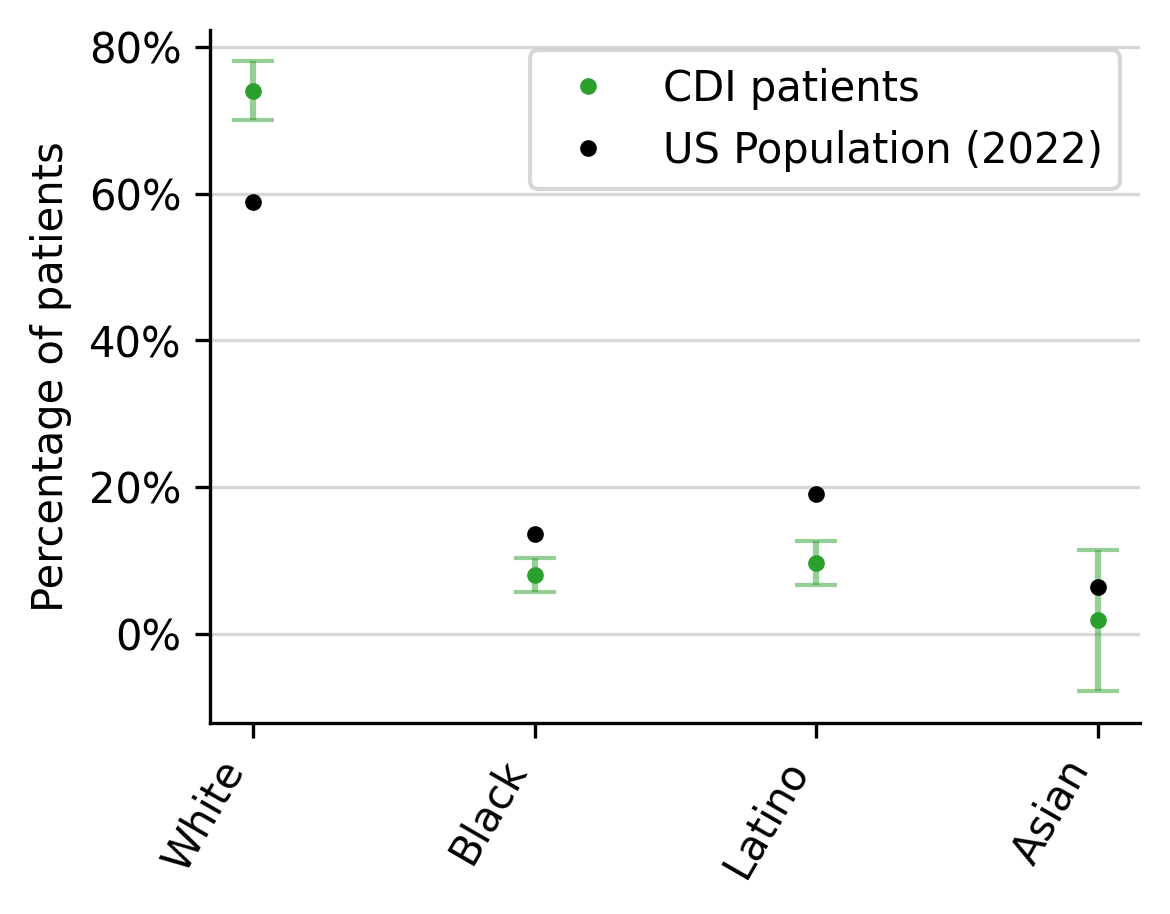

In [12]:
race_keys = [
    "num_white_corrected",
    "num_black_corrected",
    "num_latino_corrected",
    "num_asian_corrected",
]
CENSUS_NUMS = {
    "White": 58.9,
    "Black": 13.6,
    "Latino": 19.1,
    "Asian": 6.3,
}
vals_dict = defaultdict(list)
for k in race_keys:
    idxs = df[k].notnull() & ~(df[k].isin(UNKS))
    d = df[idxs]
    vals = df[k][idxs]
    vals_perc = []
    for i, v in vals.items():
        if eval.str_is_percentage(v):
            vals_perc.append(eval.percentage_to_num(v))
        else:
            vals_perc.append(100 * float(v) / d['num_total_corrected'][i])
        assert vals_perc[-1] <= 100 and vals_perc[-1] >= 0, f"{k} {v} {vals_perc[-1]}"
    # vals = [float(v[:-1]) for v in vals]
    print(vals.values, vals_perc)
    vals_dict[k] = vals_perc

# make boxplot
plt.figure(figsize=(4, 3), dpi=300)



# draw arrows from CDI patients to US Census
# for i, (k, v) in enumerate(vals_dict.items()):
#     val = CENSUS_NUMS[list(CENSUS_NUMS.keys())[i]]
#     plt.annotate(
#         "",
#         xy=(i, val),
#         xytext=(i, np.median(v)),
#         arrowprops=dict(arrowstyle="<-", color="gray", alpha=1),
#     )

for i, (k, v) in enumerate(vals_dict.items()):
    kwargs = {}
    if i == len(vals_dict) - 1:
        kwargs["label"] = "CDI patients"

    # plt.plot(np.random.normal(i, 0.05, len(v)), v, 'o', alpha=0.5, color='C2', ms=2, **kwargs)
    plt.plot(i, np.median(v), "o", color="C2", ms=3, **kwargs)  # , ms=3)
    plt.errorbar(
        i,
        np.median(v),
        yerr=np.std(v) / np.sqrt(len(v)),
        color="C2",
        capsize=5,
        alpha=0.5,
    )  # , ms=3)

    if i == len(vals_dict) - 1:
        kwargs["label"] = "US Population (2022)"
    # plot census
    val = CENSUS_NUMS[list(CENSUS_NUMS.keys())[i]]
    plt.plot(i, val, "o", color="black", ms=3, **kwargs)  # , ms=3)


plt.legend()
plt.xticks(
    labels=["White", "Black", "Latino", "Asian"],
    ticks=range(4),
    rotation=60,
    ha="right",
)
plt.yticks(ticks=range(0, 100, 20), labels=[f"{t}%" for t in range(0, 100, 20)])
plt.ylabel("Percentage of patients")
plt.grid(axis="y", alpha=0.5)
plt.show()

# Author affilliation plots

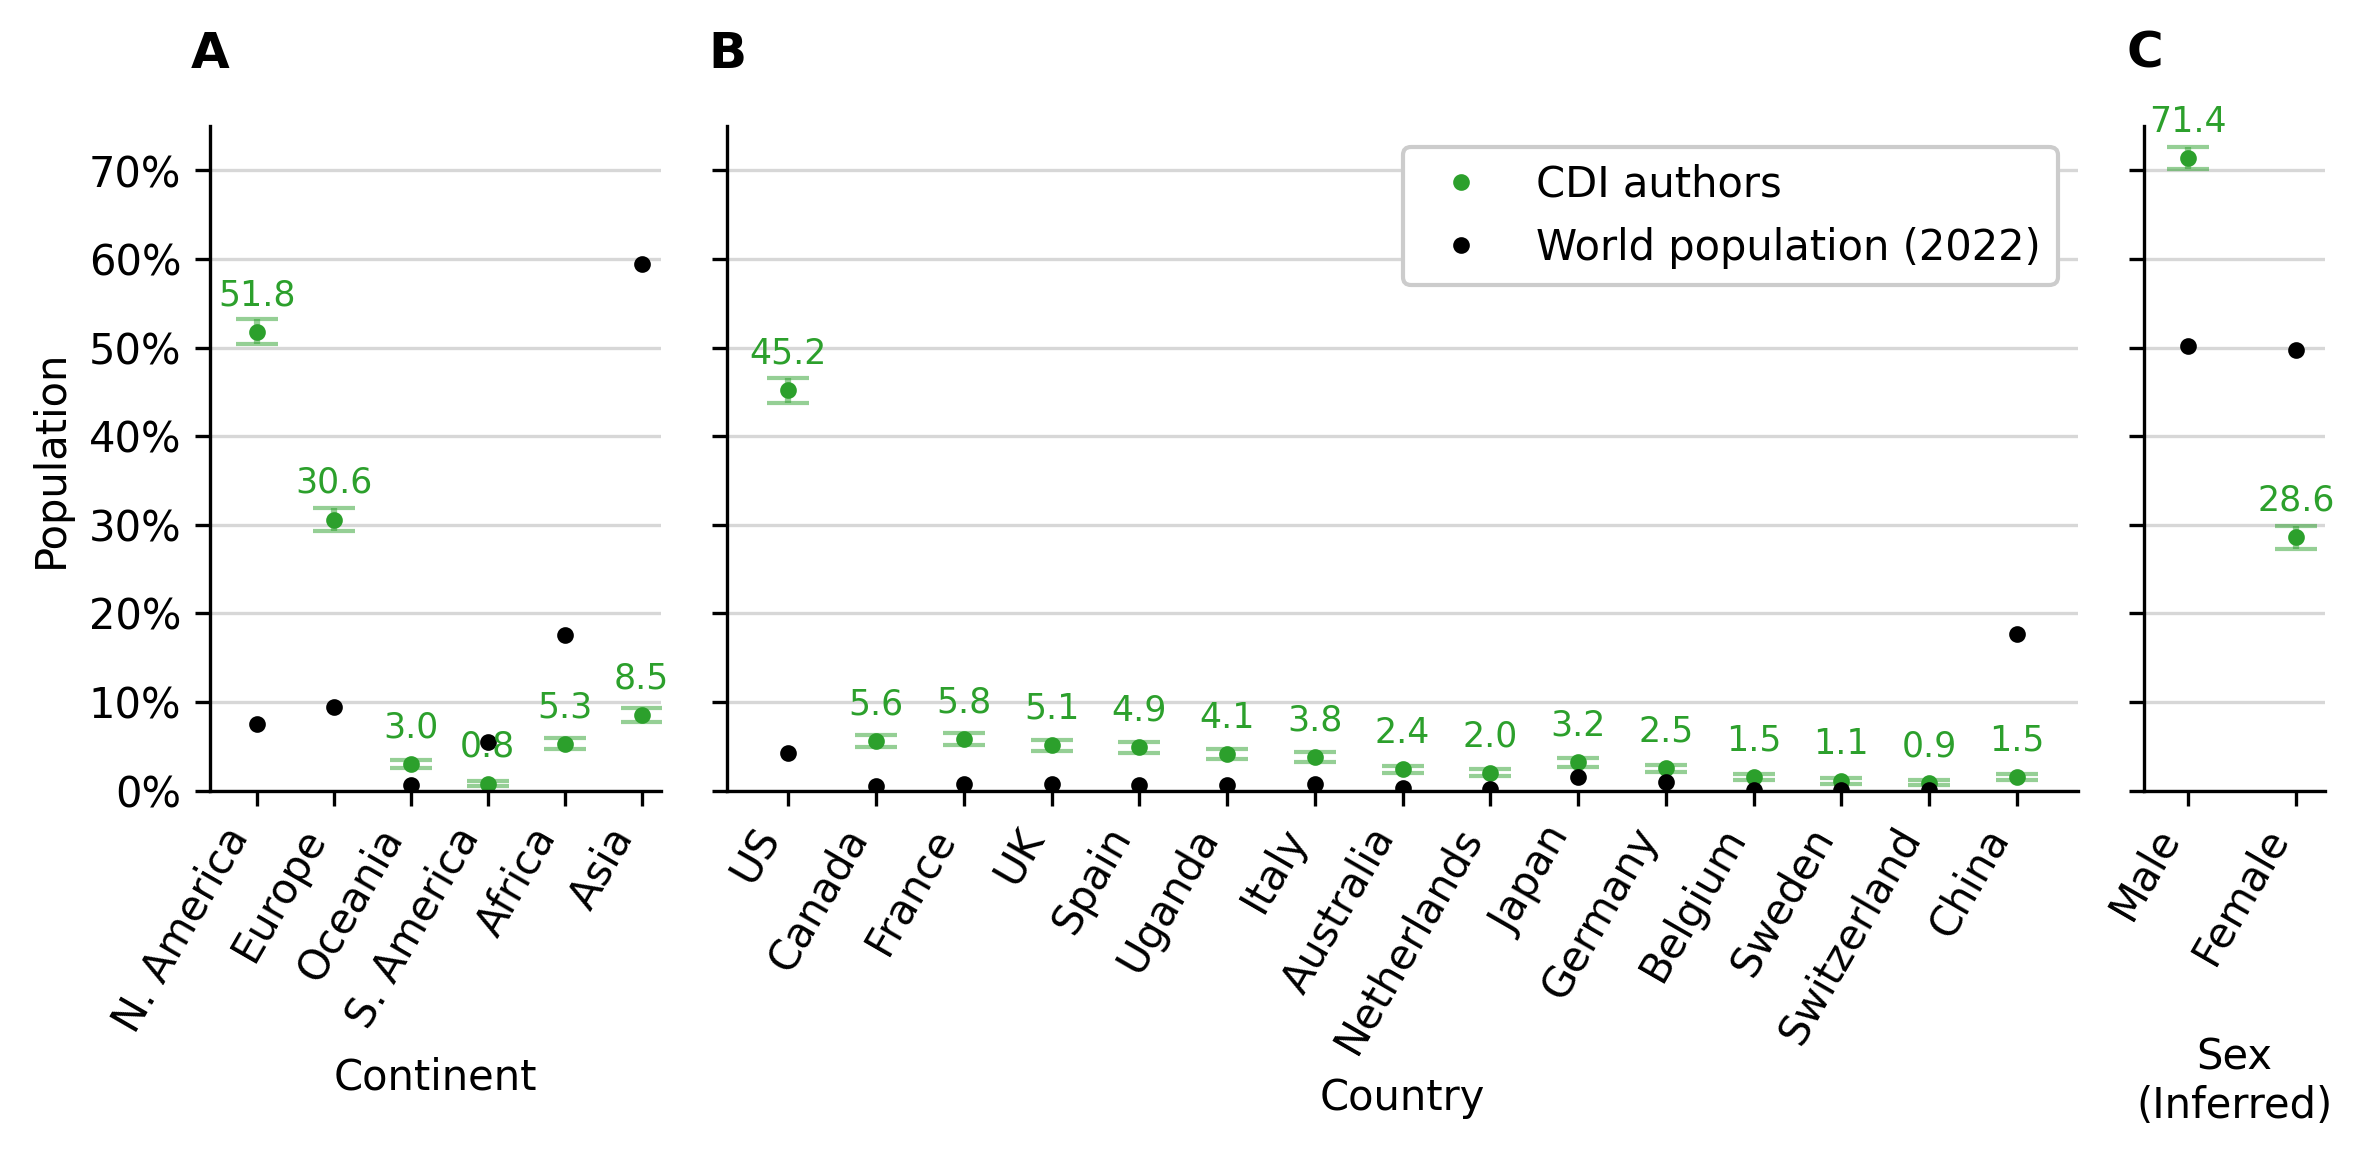

In [14]:
def to_num(x):
    return float(x.replace("%", ""))


def make_plot(tab, ax):
    # plot with no connecting line
    ax.plot(
        tab["CDI Author affiliations"].apply(to_num),
        label="CDI authors",
        color="C2",
        marker="o",
        ms=3,
        linestyle="None",
    )

    # annotate value above each point
    for i, v in enumerate(tab["CDI Author affiliations"].apply(to_num)):
        ax.annotate(
            f"{v}",
            (i, v),
            xytext=(i, v + 3),
            ha="center",
            color="C2",
            fontsize="small",
        )


    def calc_bernoulli_sem(fracs, n):
        return np.sqrt(fracs * (1 - fracs) / n)


    sems = calc_bernoulli_sem(tab["CDI Author affiliations"].apply(to_num) / 100, n=1234)
    ax.errorbar(
        range(len(tab)),
        tab["CDI Author affiliations"].apply(to_num),
        yerr=sems * 100,
        color="C2",
        capsize=5,
        alpha=0.5,
        linestyle="None",
    )

    ax.plot(
        tab["World population (UN Geoscheme, 2021)"].apply(to_num),
        label="World population (2022)",
        color="black",
        marker="o",
        ms=3,
        linestyle="None",
    )

    ax.grid(axis="y", alpha=0.5)
    ax.set_xticks(labels=tab.index.values, ticks=range(len(tab)), rotation=60, ha="right")

# fig = plt.figure(figsize=(9, 3), dpi=300)
f, axes = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 3, 0.4]}, dpi=300, figsize=(8, 4))
tits = ['Continent', 'Country', '\nSex\n(Inferred)']
for i, k in enumerate(['continents', 'countries', 'gender']):
    ax = axes[i]
    # plt.subplot(1, 3, i + 1, width_ratios=[1, 2, 1])
    tab = pd.read_csv(f'../data/author_affil_{k}.csv', header=0)
    tab = tab.rename(columns={'Unnamed: 0': 'Source'})
    tab = tab.set_index('Source')
    # tab = tab.set_index('Unnamed: 0') # = tab['Unnamed: 0']
    tab = tab.T
    make_plot(tab, ax)

    yticks = range(0, 75, 10)
    ax.set_yticks(ticks=yticks, labels=[f"{t}%" for t in yticks])
    ax.set_ylim(bottom=0, top=75)
    if i == 0:    
        ax.set_ylabel("Population")
    else:
        # hide y axis
        # ax.set_yticks([])
        ax.set_yticklabels([])

    ax.set_title('ABC'[i], x=0, y=1.05, fontweight='bold')

    if i == 1:
        # plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1)

        # set legend background to white with no transparency
        ax.legend(facecolor='w', framealpha=1)

    if i == 0:
        ax.set_xlim(left=-0.6)
    if i == 2:
        ax.set_xlim(left=-0.4, right=ax.get_xlim()[1] * 1.2)
    ax.set_xlabel(tits[i])

    # put legend above plot
    # if i == 1:
        # plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)
# make shared legend above all subplots
# fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)
# plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)

# make legend to the right of plot
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)